In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import imutils
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'cv2'

In [4]:
CSV_PATH = 'files/mimic-cxr-jpg/2.0.0'
DATASET_PATH = 'files/mimic-cxr-jpg/2.0.0/files'

In [5]:
CHEXPERT_DATA = os.path.join(CSV_PATH, 'mimic-cxr-2.0.0-chexpert.csv.gz')
METADATA_DATA = os.path.join(CSV_PATH, 'mimic-cxr-2.0.0-metadata.csv.gz')
SPLIT_DATA = os.path.join(CSV_PATH, 'mimic-cxr-2.0.0-split.csv.gz')
NEGBIO_DATA = os.path.join(CSV_PATH, 'mimic-cxr-2.0.0-negbio.csv.gz')

In [6]:
dfCHE = pd.read_csv(CHEXPERT_DATA)
dfMeta = pd.read_csv(METADATA_DATA)
dfSplit = pd.read_csv(SPLIT_DATA)
dfNegBio = pd.read_csv(NEGBIO_DATA)


NameError: name 'pd' is not defined

In [2]:
def mimic_data_generator(dfMeta, dfNegBio, dfSplit, generator_type, batch_size):
    trainDf = dfSplit[dfSplit['split'] == 'train']
    random_indexes = [ random.randint(0, trainDf.shape[0] - 1) for i in range(batch_size)]
    rows = [ trainDf.iloc[index] for index in random_indexes]
    print(random_indexes)
    metaDfs = [ dfMeta[ dfMeta['subject_id'] == row['subject_id']][dfMeta['study_id'] == row['study_id']] for row in rows]
    
    for metaDf in metaDfs:
        for index, row in metaDf.iterrows():
#             print(row)
            folder_path = os.path.join(DATASET_PATH, 'p'+str(row['subject_id'])[:2])
            folder_path = os.path.join(folder_path, 'p'+str(row['subject_id']))
            folder_path = os.path.join(folder_path, 's'+str(row['study_id']))
            image_path = os.path.join(folder_path, str(row['dicom_id'])+'.jpg')
            print(image_path)
#             print(os.path.exists(image_path))
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224,224))
            image = image / 255
            plt.imshow(imutils.resize(image, width=800))
#             2.0.0/files/p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.jpg
#             imagepath = os.path.j
            return image, dfNegBio[ dfNegBio['subject_id'] == row['subject_id']][dfNegBio['study_id'] == row['study_id']]
            

In [3]:
from keras.models import load_model
 
# load model
model = load_model('resnet_new.h5')

ModuleNotFoundError: No module named 'keras'

[185924]
files/mimic-cxr-jpg/2.0.0/files/p15/p15058939/s53420231/a9c3f6e5-d9070e86-b389cff3-a792b527-8ae586c4.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


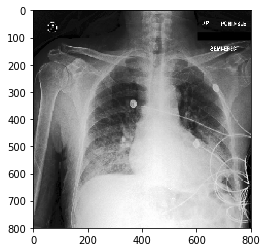

In [75]:
processsed_image, dRow = mimic_data_generator(dfMeta, dfNegBio, dfSplit, 'test', 1)

In [76]:
prediction = model.predict(np.asarray([processsed_image]))

In [77]:
for i in range(len(prediction[0])):
    print(dRow.columns[2:][i] +": "+str(prediction[0][i]))

Atelectasis: 0.14628527
Cardiomegaly: 0.076569736
Consolidation: 0.013188183
Edema: 0.036510795
Enlarged Cardiomediastinum: 0.015949458
Fracture: 0.0043073595
Lung Lesion: 0.006712675
Lung Opacity: 0.17360124
No Finding: 0.36816382
Pleural Effusion: 0.11611459
Pleural Other: 0.0036211228
Pneumonia: 0.0723122
Pneumothorax: 0.0071669607
Support Devices: 0.18322255
